# Exercise 7 chapter 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import make_moons

# a) generating a dataset. 

Use make_moons to simulate a data set: 
```python
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
```
After you have generated it, check the shape, print out some rows of it and also do a plot: 

```python
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
```

In [8]:
# Create dataset with make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Print shape and first few rows
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("First 5 rows of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

Shape of X: (10000, 2)
Shape of y: (10000,)
First 5 rows of X:
 [[ 0.9402914   0.12230559]
 [ 0.12454026 -0.42477546]
 [ 0.26198823  0.50841438]
 [-0.49523824  0.07258876]
 [-0.87941281  0.54937303]]
First 5 values of y:
 [1 0 0 0 0]


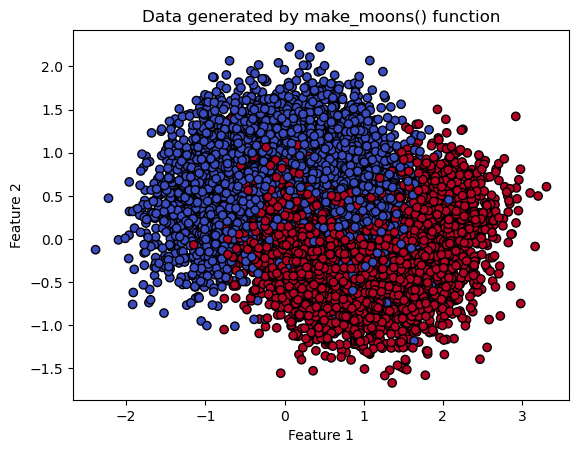

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
plt.show()

# b) Use train_test_split() to split the dataset into a training set and a test set.

In [10]:
# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 2), y_train=(8000,)
Test set shape: X_test=(2000, 2), y_test=(2000,)


# c) Use grid search  to find good hyperparameter values for a DecisionTreeClassifier.

You can try the following hyperparameters:
```python
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
```

In [11]:
params = {"max_leaf_nodes": list(range(2, 100)), "min_samples_split": [2, 3, 4]}

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(tree_clf, params, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best parameters: {'max_leaf_nodes': 23, 'min_samples_split': 2}
Best accuracy score: 0.85925


# d) Train your model on the full training set using the best found model parameters and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

# OBS: By default, GridSearchCV trains the best model found on the whole training set since the hyperparameter refit has the default value True. 

Check the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html and look at the function parameter refit = True.

In [12]:
# Retrieve the best model from GridSearchCV
best_tree_clf = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_tree_clf.predict(X_test)

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Test Accuracy of Best Decision Tree Model: {test_accuracy:.4f}")

Test Accuracy of Best Decision Tree Model: 0.8735
